In [ ]:
# Setup
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Dropdown, IntSlider
np.random.seed(999)
# seed 42 gave worse plots with train error > test error. for order=1 or 2, train error > test error.
# seed 999 gives good plots, but regularization error plots don't spike for ln lambda < -25 like in textbook. for order = 1 or 2, train error > test error.
# seed 3 gives alright plots, train error < test error for all orders, but train error is greater for some ln lambda values when looking at regularization plots.
# seed 35 best seed after 999, but error does not spike as high as expected for M=9. same issue for ln lambda < -25.
# seed 6 doesn't have high error for M=9 but shows slight error increase for ln lambda < -25.
# seed 70 has high error for M=9, but train error > test error for M=1,2 and some ln lambda values.
# seeds 352, 824, 80, 200, 666, 700 not ideal

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[ 0.01271578  0.7829767   1.01628925  0.78018049  0.3154067  -0.40691021
 -0.70939865 -1.19394477 -0.4971548   0.09452934]
1.2.1 plotted
Saved figure to figures/1.2.1_synthetic_data.png


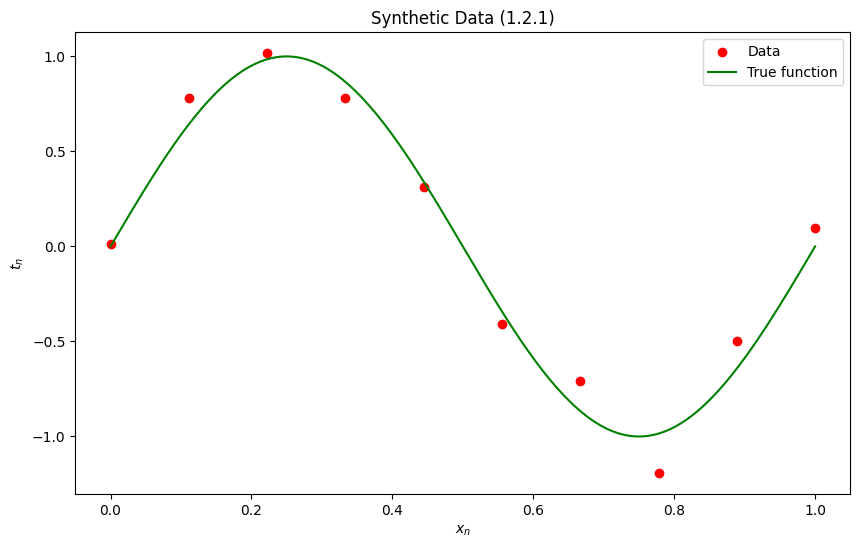

In [38]:

# 1.2.1) Synthetic data

# We use a synthetic data set generated by sampling from a sinusoidal function.

N=10 # number of data points
x_n = np.linspace(0, 1, N) # input values
print(x_n)
t_n = np.sin(2 * np.pi * x_n) # target values computed by function sin(2πx)
t_n += np.random.normal(0, 0.1, N) # adding gaussian noise
print(t_n)
# plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(x_n, t_n, label='Data', color='red')
plt.plot(np.linspace(0,1,200), np.sin(2 * np.pi * np.linspace(0,1,200)), label='True function', color='green')
plt.xlabel('$x_n$')
plt.ylabel('$t_n$')
plt.title('Synthetic Data (1.2.1)')
plt.legend()
print('1.2.1 plotted')
plt.savefig('../figures/1.2.1_synthetic_data.png', dpi=150, bbox_inches='tight')
print('Saved figure to figures/1.2.1_synthetic_data.png')
plt.show()
plt.close()


Fitting polynomial of degree 0
Polynomial weights for degree 0: [0.01946898]
Fitting polynomial of degree 1
Polynomial weights for degree 1: [-1.33455398  0.68674597]
Fitting polynomial of degree 3
Polynomial weights for degree 3: [ 2.17455202e+01 -3.21438048e+01  1.05671246e+01  5.34164119e-03]
Fitting polynomial of degree 9
Polynomial weights for degree 9: [-3.61420693e+04  1.57990031e+05 -2.89537648e+05  2.88985905e+05
 -1.70692883e+05  6.06090889e+04 -1.24878578e+04  1.32290544e+03
 -4.73911877e+01  1.27157844e-02]
1.2.2 plotted using inbuilt libraries
Saved figure to figures/1.2.2_polyfits_inbuilt.png


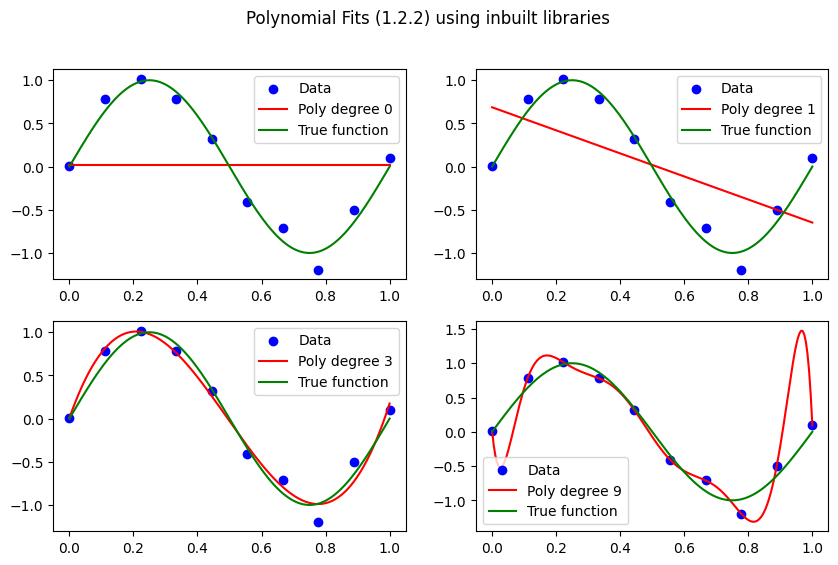

In [39]:
# 1.2.2) Linear model

# Fitting polynomials of different degrees to the synthetic data. 
# Using inbuilt libraries first and then writing custom functions.

M_range = [0, 1, 3, 9] # different polynomial orders to fit

# Using inbuilt libraries to fit and evaluate polynomials of different degrees

plt.figure(figsize=(10, 6))
for i, M in enumerate(M_range):
    print(f'Fitting polynomial of degree {M}')
    weights = np.polyfit(x_n, t_n, M) # fit polynomial of degree M
    x_grid = np.linspace(0, 1, 200)
    y_grid = np.polyval(weights, x_grid) # evaluate fitted polynomial
    print(f'Polynomial weights for degree {M}: {weights}')
    # plotting the data 
    plt.subplot(2, 2, i + 1)
    plt.scatter(x_n, t_n, color='blue', label='Data')
    plt.plot(x_grid, y_grid, color='red', label=f'Poly degree {M}')
    plt.plot(x_grid, np.sin(2 * np.pi * x_grid), color='green', label='True function')
    plt.legend()
plt.suptitle('Polynomial Fits (1.2.2) using inbuilt libraries')
print('1.2.2 plotted using inbuilt libraries')
plt.savefig('../figures/1.2.2_polyfits_inbuilt.png', dpi=150, bbox_inches='tight')
print('Saved figure to figures/1.2.2_polyfits_inbuilt.png')
plt.show()
plt.close()


Fitting polynomial of degree 0 using custom function
Polynomial weights for degree 0: [0.]
Fitting polynomial of degree 1 using custom function
Polynomial weights for degree 1: [0. 0.]
Fitting polynomial of degree 3 using custom function
Polynomial weights for degree 3: [0. 0. 0. 0.]
Fitting polynomial of degree 9 using custom function
Polynomial weights for degree 9: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1.2.2 plotted using custom function with dummy weights
Saved figure to figures/1.2.2_custom_dummy_weights.png


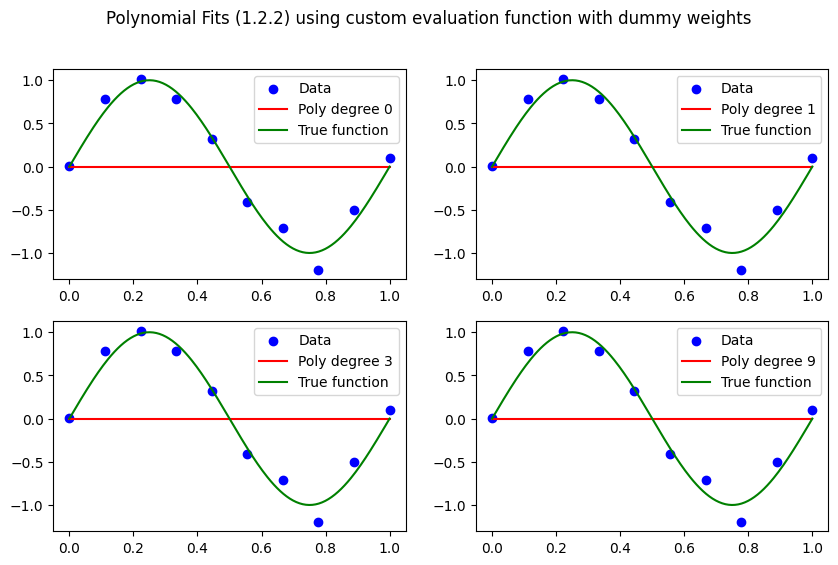

In [40]:
# Using custom function to evaluate polynomials

def y(x,w):
    """Evaluate polynomial at x with coefficients w."""
    return sum(w[j] * x**j for j in range(len(w)))

plt.figure(figsize=(10, 6))
for i, M in enumerate(M_range):
    print(f'Fitting polynomial of degree {M} using custom function')
    # weights = np.polyfit(x_n, t_n, M) # fit polynomial using inbuilt function
    # weights = weights[::-1]  # reverse to ascending order
    weights = np.zeros(M + 1) # we take dummy weights to begin with
    x_grid = np.linspace(0, 1, 200)
    y_grid = y(x_grid, weights) # evaluate polynomial using custom function
    print(f'Polynomial weights for degree {M}: {weights}')
    # plotting the data 
    plt.subplot(2, 2, i + 1)
    plt.scatter(x_n, t_n, color='blue', label='Data')
    plt.plot(x_grid, y_grid, color='red', label=f'Poly degree {M}')
    plt.plot(x_grid, np.sin(2 * np.pi * x_grid), color='green', label='True function')
    plt.legend()
plt.suptitle('Polynomial Fits (1.2.2) using custom evaluation function with dummy weights')
print('1.2.2 plotted using custom function with dummy weights')
plt.savefig('../figures/1.2.2_custom_dummy_weights.png', dpi=150, bbox_inches='tight')
print('Saved figure to figures/1.2.2_custom_dummy_weights.png')
plt.show()
plt.close()

Finding optimal weights for polynomial of degree 0
Optimal weights for degree 0: [0.01946898]
Finding optimal weights for polynomial of degree 1
Optimal weights for degree 1: [ 0.68674597 -1.33455398]
Finding optimal weights for polynomial of degree 3
Optimal weights for degree 3: [ 5.34164119e-03  1.05671246e+01 -3.21438048e+01  2.17455202e+01]
Finding optimal weights for polynomial of degree 9
Optimal weights for degree 9: [ 1.27194978e-02 -4.76960301e+01  1.32993079e+03 -1.25509788e+04
  6.09048740e+04 -1.71496766e+05  2.90299271e+05 -2.90808938e+05
  1.58661404e+05 -3.62910190e+04]
1.2.3 plotted with custom error minimization
Saved figure to figures/1.2.3_custom_error_minimization.png


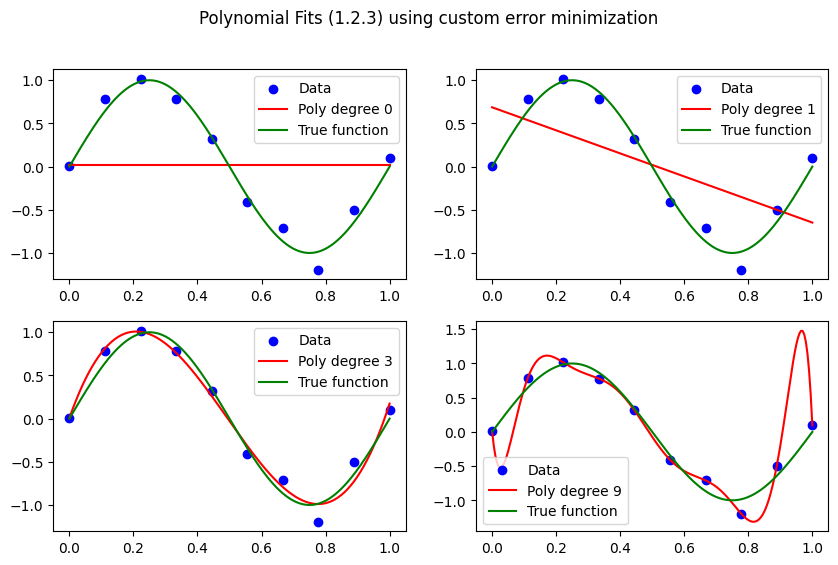

In [41]:
# 1.2.3) Error function

# Previously used inbuilt function np.polyfit to fit polynomials.
# Now defining an error function to quantify the fit quality, so we can find the best weights ourselves.

def E(w, x_n, t_n):
    """Compute sum of squares of displacements of each data point from the function y."""
    return 0.5 * np.sum((y(x_n,w) - t_n) ** 2)

# Now we have to choose the value of w that minimizes E(w).

# Because the error function is a quadratic function of the coefficients w, its derivatives with respect to the coefficients will be linear in the elements of w, and so the minimization of the error function has a unique solution, denoted by w*. The resulting polynomial is given by the function y(x, w*).

# custom minimization of the error function to find optimal weights
def minimize_error_function(M, x_n, t_n):
    """Minimize the error function E to find optimal weights w* for polynomial of degree M."""
    A = np.zeros((M + 1, M + 1))
    b = np.zeros(M + 1)
    for i in range(M + 1):
        for j in range(M + 1):
            A[i, j] = np.sum(x_n ** (i + j))
        b[i] = np.sum(t_n * (x_n ** i))
    w_star = np.linalg.solve(A, b)
    return w_star

# using custom gradient descent function
def gradE(w, x_n, t_n):
    """Compute gradient of the error function E with respect to weights w."""
    grad = np.zeros_like(w)
    for i in range(len(w)):
        grad[i] = np.sum((y(x_n, w) - t_n) * (x_n ** i))
    return grad

def gradient_descent(M, x_n, t_n, eta=0.001, steps=1000):
    """Perform gradient descent to minimize the error function E."""
    w = np.zeros(M + 1)  # initial guess for weights
    for step in range(steps):
        gradient = gradE(w, x_n, t_n)
        w -= eta * gradient
    return w

# finding w*
from scipy.optimize import minimize
plt.figure(figsize=(10, 6)) 
for i, M in enumerate(M_range):
    print(f'Finding optimal weights for polynomial of degree {M}')
    # w_0 = np.zeros(M + 1)  # initial guess for weights, matrix of zeros
    # result = minimize(E, w_0)  # minimize error function
    # w_star = result.x
    # w_star = gradient_descent(M)
    w_star = minimize_error_function(M, x_n, t_n)
    print(f'Optimal weights for degree {M}: {w_star}')
    # plotting the fitted polynomial
    x_grid = np.linspace(0, 1, 200)
    y_grid = y(x_grid, w_star)
    plt.subplot(2, 2, i + 1)
    plt.scatter(x_n, t_n, color='blue', label='Data')
    plt.plot(x_grid, y_grid, color='red', label=f'Poly degree {M}')
    plt.plot(x_grid, np.sin(2 * np.pi * x_grid), color='green', label='True function')
    plt.legend()
plt.suptitle('Polynomial Fits (1.2.3) using custom error minimization')
print('1.2.3 plotted with custom error minimization')
plt.savefig('../figures/1.2.3_custom_error_minimization.png', dpi=150, bbox_inches='tight')
print('Saved figure to figures/1.2.3_custom_error_minimization.png')
plt.show()
plt.close()

200 [0.         0.00502513 0.01005025 0.01507538 0.0201005  0.02512563
 0.03015075 0.03517588 0.04020101 0.04522613] [-0.1000503   0.11037538 -0.21440958 -0.05162557  0.07885731  0.36046996
  0.14798549  0.61943946  0.49599861  0.07149339] [] []
Calculating RMS error for polynomial of degree 0
Calculating RMS error for polynomial of degree 1
Calculating RMS error for polynomial of degree 2
Calculating RMS error for polynomial of degree 3
Calculating RMS error for polynomial of degree 4
Calculating RMS error for polynomial of degree 5
Calculating RMS error for polynomial of degree 6
Calculating RMS error for polynomial of degree 7
Calculating RMS error for polynomial of degree 8
Calculating RMS error for polynomial of degree 9
1.2.4 plotted training and test RMS errors vs polynomial degree
Saved figure to figures/1.2.4_rms_errors_train_test.png


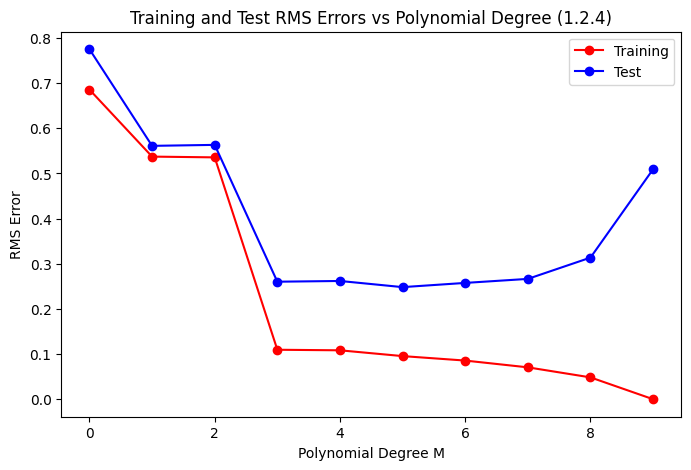

In [42]:
# 1.2.4) Model complexity 

# Choosing the order M of the polynomial: We can see that as we increase the polynomial degree, the fit improves on the training data, but may lead to overfitting.
# We can obtain some quantitative insight into the dependence of the generalization performance on M by considering a separate set of data known as a test set, comprising 100 data points generated using the same procedure as used to generate the training set points. For each value of M, we can evaluate the residual value of E(w*) given by (1.2) for the training data, and we can also evaluate E(w*) for the test data set.

# Generating test data
N_test = 200
x_n_test = np.linspace(0, 1, N_test)
t_n_test = np.sin(2 * np.pi * x_n_test)
t_n_test += np.random.normal(0, 0.25, N_test)
E_train = []
E_test = []
print(N_test, x_n_test[:10], t_n_test[:10], E_train, E_test)

# Instead of the error function E, we use RMS error which allows us to compare different sizes of data sets on an equal footing.
def E_rms(w, x, t):
    """Compute root mean square error."""
    return np.sqrt(np.mean((y(x,w) - t) ** 2))

M_test_range = range(0, 10)  # polynomial degrees from 0 to 9

# calculating RMS errors for training and test data
for M in M_test_range:
    print(f'Calculating RMS error for polynomial of degree {M}')
    # w_0 = np.zeros(M + 1)  # initial guess for weights
    # result = minimize(E, w_0)  # minimize error function
    # w_star = result.x
    w_star = minimize_error_function(M, x_n, t_n)
    # w_star = gradient_descent(M)
    E_train.append(E_rms(w_star, x_n, t_n))
    E_test.append(E_rms(w_star, x_n_test, t_n_test))
# plotting RMS errors
plt.figure(figsize=(8, 5))
plt.plot(M_test_range, E_train, marker='o', color='red', label='Training')
plt.plot(M_test_range, E_test, marker='o', color='blue', label='Test')
plt.xlabel('Polynomial Degree M')
plt.ylabel('RMS Error')
plt.legend()
plt.title('Training and Test RMS Errors vs Polynomial Degree (1.2.4)')
print('1.2.4 plotted training and test RMS errors vs polynomial degree')
plt.savefig('../figures/1.2.4_rms_errors_train_test.png', dpi=150, bbox_inches='tight')
print('Saved figure to figures/1.2.4_rms_errors_train_test.png')
plt.show()
plt.close()

Generating data and fitting polynomial of degree 9 for N=15
Generating data and fitting polynomial of degree 9 for N=100
1.2.4 plotted effect of dataset size on overfitting
Saved figure to figures/1.2.4_overfitting_dataset_size.png


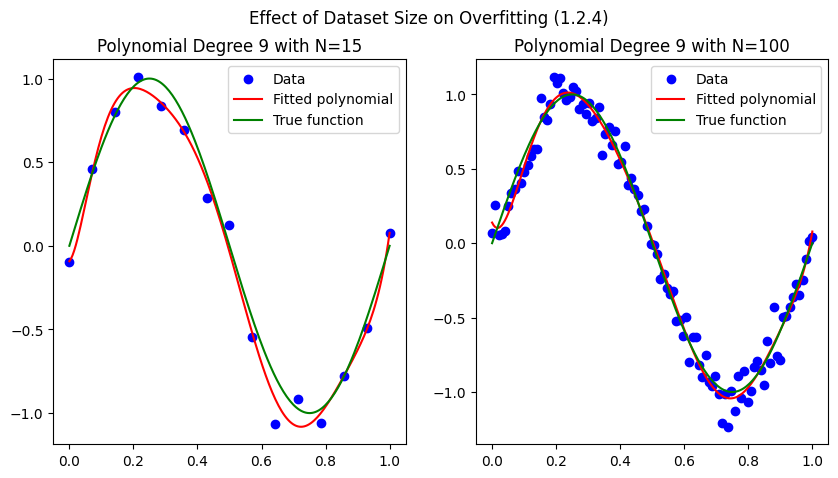

In [43]:
# showing how overfitting decreases with larger datasets at M=9
N_values = [15, 100]
plt.figure(figsize=(10, 5))
for j, N in enumerate(N_values):
    print(f'Generating data and fitting polynomial of degree 9 for N={N}')
    x_n_large = np.linspace(0, 1, N)
    t_n_large = np.sin(2 * np.pi * x_n_large) + np.random.normal(0, 0.1, N)
    # w_0 = np.zeros(10)  # initial guess for weights for M=9
    # result = minimize(E, w_0, method='BFGS')  # minimize error function
    # w_star = result.x
    w_star = minimize_error_function(M=9, x_n=x_n_large, t_n=t_n_large)
    # w_star = gradient_descent(M=9)
    x_grid = np.linspace(0, 1, 200)
    y_grid = y(x_grid, w_star)
    plt.subplot(1, 2, j + 1)
    plt.scatter(x_n_large, t_n_large, color='blue', label='Data')
    plt.plot(x_grid, y_grid, color='red', label='Fitted polynomial')
    plt.plot(x_grid, np.sin(2 * np.pi * x_grid), color='green', label='True function')
    plt.legend()
    plt.title(f'Polynomial Degree 9 with N={N}')
plt.suptitle('Effect of Dataset Size on Overfitting (1.2.4)')
print('1.2.4 plotted effect of dataset size on overfitting')
plt.savefig('../figures/1.2.4_overfitting_dataset_size.png', dpi=150, bbox_inches='tight')
print('Saved figure to figures/1.2.4_overfitting_dataset_size.png')
plt.show()
plt.close()

Weights without regularization:
Degree 0: [0.01946898]
Degree 1: [ 0.68674597 -1.33455398]
Degree 3: [ 5.34164119e-03  1.05671246e+01 -3.21438048e+01  2.17455202e+01]
Degree 9: [ 1.27194978e-02 -4.76960301e+01  1.32993079e+03 -1.25509788e+04
  6.09048740e+04 -1.71496766e+05  2.90299271e+05 -2.90808938e+05
  1.58661404e+05 -3.62910190e+04]
x_n: [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
t_n: [ 0.01271578  0.7829767   1.01628925  0.78018049  0.3154067  -0.40691021
 -0.70939865 -1.19394477 -0.4971548   0.09452934]
Fitting polynomial (M=9) using regularized error with λ = 0
Optimal weights for λ = 0: [ 1.27194978e-02 -4.76960301e+01  1.32993079e+03 -1.25509788e+04
  6.09048740e+04 -1.71496766e+05  2.90299271e+05 -2.90808938e+05
  1.58661404e+05 -3.62910190e+04]
Fitting polynomial (M=9) using regularized error with λ = 9.357622968840175e-14
Optimal weights for λ = 9.357622968840175e-14: [ 1.22525291e-02 -1.23282878e+01  5

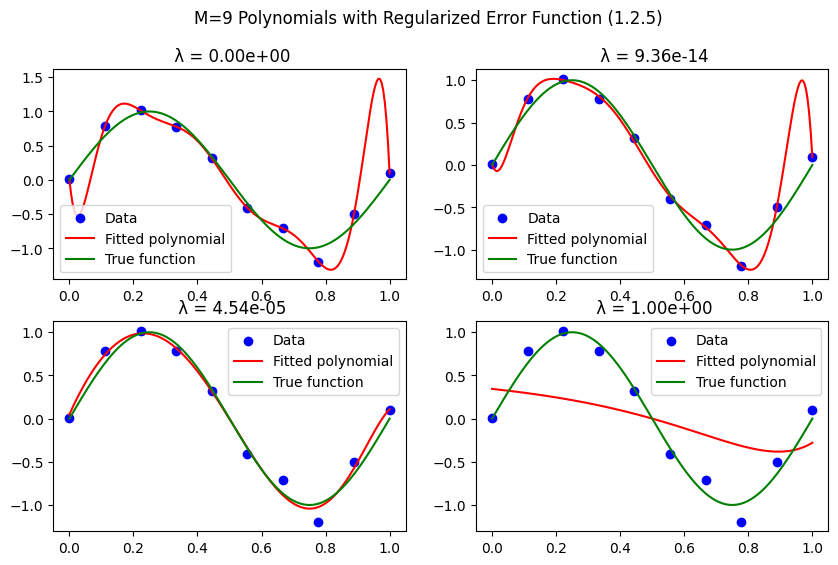

In [52]:
# 1.2.5) Regularization

# printing the weights at each order without regularization
print("Weights without regularization:")
for M in M_range:
    # w_0 = np.zeros(M + 1)  # initial guess for weights
    # result = minimize(E, w_0)  # minimize error function
    # w_star = result.x
    w_star = minimize_error_function(M, x_n, t_n)
    print(f'Degree {M}: {w_star}')

# Regularization adds a penalty term to the error function to discourage large weights, aka shrinkage methods/weight decay.

def E_reg(w, lam, x_n, t_n):
    """Compute regularized error function."""
    return E(w, x_n, t_n) + (lam / 2) * np.sum(w ** 2)

def gradE_reg(w, lam, x_n, t_n):
    """Compute gradient of the regularized error function."""
    grad = gradE(w, x_n, t_n)
    grad += lam * w # adding regularization term
    return grad

def gradient_descent_reg(M, lam, x_n, t_n, eta=0.1, steps=100):
    """Perform gradient descent to minimize the regularized error function E_reg."""
    w = np.zeros(M + 1)  # initial guess for weights
    for step in range(steps):
        gradient = gradE_reg(w, lam, x_n, t_n)
        w -= eta * gradient
    return w

def minimize_error_function_reg(M, lam, x_n, t_n):
    """Minimize the regularized error function E_reg to find optimal weights w* for polynomial of degree M."""
    if (lam == 0):
        return minimize_error_function(M, x_n, t_n)
    else:
        A = np.zeros((M + 1, M + 1))
        b = np.zeros(M + 1)
        for i in range(M + 1):
            for j in range(M + 1):
                A[i, j] = np.sum(x_n ** (i + j))
            A[i, i] += lam  # adding regularization term
            b[i] = np.sum(t_n * (x_n ** i))
        w_star = np.linalg.solve(A, b)
        return w_star

# Plotting M=9 polynomial with different lambda values for regularization
print(f"x_n: {x_n}")
print(f"t_n: {t_n}")
lam_values = sorted([np.exp(-30), np.exp(-10), np.exp(0), 0])  # lambda values
plt.figure(figsize=(10, 6))
for i, lam in enumerate(lam_values):
    print(f'Fitting polynomial (M=9) using regularized error with λ = {lam}')
    # w_0 = np.zeros(10)  # initial guess for weights for M=9
    # result = minimize(E_reg, w_0, args=(lam,))  # minimize regularized error function
    # w_star = result.x
    w_star = minimize_error_function_reg(M=9, lam=lam, x_n=x_n, t_n=t_n)
    # w_star = gradient_descent_reg(M=9, lam=lam)
    print(f'Optimal weights for λ = {lam}: {w_star}')
    x_grid = np.linspace(0, 1, 200)
    y_grid = y(x_grid, w_star)
    plt.subplot(2, 2, i + 1)
    plt.scatter(x_n, t_n, color='blue', label='Data')
    plt.plot(x_grid, y_grid, color='red', label='Fitted polynomial')
    plt.plot(x_grid, np.sin(2 * np.pi * x_grid), color='green', label='True function')
    plt.title(f' λ = {lam:.2e}')
    plt.legend()
plt.suptitle('M=9 Polynomials with Regularized Error Function (1.2.5)')
print('1.2.5 plotted regularized polynomial fits')
plt.savefig('../figures/1.2.5_regularized_fits.png', dpi=150, bbox_inches='tight')
print('Saved figure to figures/1.2.5_regularized_fits.png')
plt.show()
plt.close()

In [86]:
# Showing training and test errors vs polynomial degree with regularization

def E_rms_reg(w, x, t, lam):
    """Compute root mean square error."""
    return E_rms(w, x, t) + ((lam / 2) * np.sum(w ** 2))


def plot_traintest_reg(lam = 0.0001):
    E_train = []
    E_test = []
    # print(lam)
    # print(type(lam))
    M_test_range = range(0, 10)  # polynomial degrees from 0 to 9
    # calculating RMS errors for training and test data
    for M in M_test_range:
        # print(f'Calculating RMS error for polynomial of degree {M}')
        # w_0 = np.zeros(M + 1)  # initial guess for weights
        # result = minimize(E, w_0)  # minimize error function
        # w_star = result.x
        w_star = minimize_error_function_reg(M, lam, x_n, t_n)
        # w_star = gradient_descent(M)
        E_train.append(E_rms_reg(w_star, x_n, t_n, lam))
        E_test.append(E_rms_reg(w_star, x_n_test, t_n_test, lam))
    # plotting RMS errors
    plt.figure(figsize=(8, 5))
    plt.plot(M_test_range, E_train, marker='o', color='red', label='Training')
    plt.plot(M_test_range, E_test, marker='o', color='blue', label='Test')
    plt.xlabel('Polynomial Degree M')
    plt.ylabel('RMS Error')
    plt.legend()
    plt.text(-0.3, min(min(E_train), min(E_test)), f'λ = {lam}')
    plt.title(f'Training and Test RMS Errors vs Polynomial Degree with regularization (1.2.5)')
    # print('1.2.5 plotted training and test RMS errors vs polynomial degree with regularization')
    plt.savefig('../figures/1.2.5_rms_errors_train_test_reg.png', dpi=150, bbox_inches='tight')
    # print('Saved figure to figures/1.2.5_rms_errors_train_test_reg.png')
    plt.show()
    plt.close()



interact(
    plot_traintest_reg,
    lam = Dropdown(options=[0.0, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0], value=0, description='λ')
)

interactive(children=(Dropdown(description='λ', options=(0.0, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0), value=0.0)…

<function __main__.plot_traintest_reg(lam=0.0001)>

Calculating RMS error for ln λ = -30.0
Calculating RMS error for ln λ = -29.387755102040817
Calculating RMS error for ln λ = -28.775510204081634
Calculating RMS error for ln λ = -28.163265306122447
Calculating RMS error for ln λ = -27.551020408163264
Calculating RMS error for ln λ = -26.93877551020408
Calculating RMS error for ln λ = -26.3265306122449
Calculating RMS error for ln λ = -25.714285714285715
Calculating RMS error for ln λ = -25.10204081632653
Calculating RMS error for ln λ = -24.489795918367346
Calculating RMS error for ln λ = -23.877551020408163
Calculating RMS error for ln λ = -23.26530612244898
Calculating RMS error for ln λ = -22.653061224489797
Calculating RMS error for ln λ = -22.04081632653061
Calculating RMS error for ln λ = -21.42857142857143
Calculating RMS error for ln λ = -20.816326530612244
Calculating RMS error for ln λ = -20.20408163265306
Calculating RMS error for ln λ = -19.591836734693878
Calculating RMS error for ln λ = -18.97959183673469
Calculating RMS 

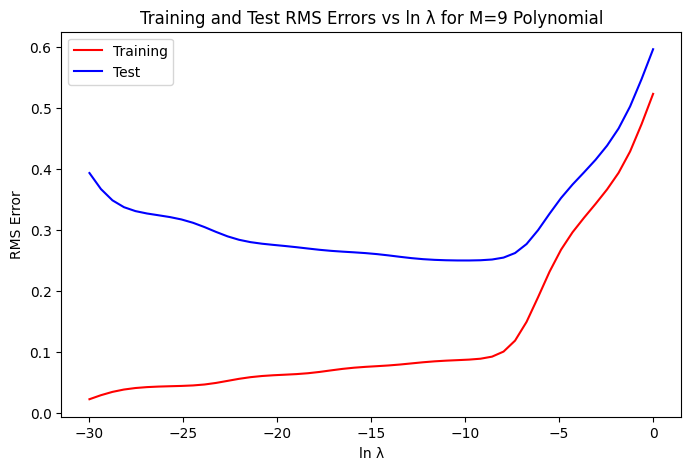

In [46]:
# Graph of the root-meansquare error versus ln λ for the M = 9 polynomial for training and test sets.

E_train_reg = []
E_test_reg = []
ln_lam_range = np.linspace(-30, 0, 50)  # range of ln lambda values
for ln_lam in ln_lam_range:
    lam = np.exp(ln_lam)
    print(f'Calculating RMS error for ln λ = {ln_lam}')
    # w_0 = np.zeros(10)  # initial guess for weights for M=9
    # result = minimize(E_reg, w_0, args=(lam,))  # minimize regularized error function
    # w_star = result.x
    w_star = minimize_error_function_reg(M=9, lam=lam, x_n=x_n, t_n=t_n)
    # w_star = gradient_descent_reg(M=9, lam=lam)
    E_train_reg.append(E_rms(w_star, x_n, t_n))
    E_test_reg.append(E_rms(w_star, x_n_test, t_n_test))
# plotting RMS errors
plt.figure(figsize=(8, 5))
plt.plot(ln_lam_range, E_train_reg, color='red', label='Training')
plt.plot(ln_lam_range, E_test_reg, color='blue', label='Test')
plt.xlabel('ln λ')
plt.ylabel('RMS Error')
plt.legend()
plt.title('Training and Test RMS Errors vs ln λ for M=9 Polynomial')
print('1.2.5 plotted training and test RMS errors vs ln λ for M=9 polynomial')
plt.savefig('../figures/1.2.5_rms_vs_ln_lambda.png', dpi=150, bbox_inches='tight')
print('Saved figure to figures/1.2.5_rms_vs_ln_lambda.png')
plt.show()
plt.close()


Calculating RMS error using sklearn for ln λ = -30.0
Calculating RMS error using sklearn for ln λ = -29.387755102040817
Calculating RMS error using sklearn for ln λ = -28.775510204081634
Calculating RMS error using sklearn for ln λ = -28.163265306122447
Calculating RMS error using sklearn for ln λ = -27.551020408163264
Calculating RMS error using sklearn for ln λ = -26.93877551020408
Calculating RMS error using sklearn for ln λ = -26.3265306122449
Calculating RMS error using sklearn for ln λ = -25.714285714285715
Calculating RMS error using sklearn for ln λ = -25.10204081632653
Calculating RMS error using sklearn for ln λ = -24.489795918367346
Calculating RMS error using sklearn for ln λ = -23.877551020408163
Calculating RMS error using sklearn for ln λ = -23.26530612244898
Calculating RMS error using sklearn for ln λ = -22.653061224489797
Calculating RMS error using sklearn for ln λ = -22.04081632653061
Calculating RMS error using sklearn for ln λ = -21.42857142857143
Calculating RMS 

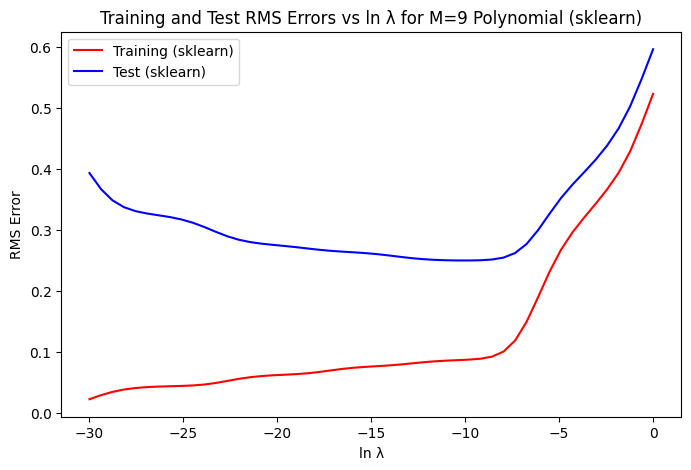

In [47]:
# using inbuilt libraries for the above instead of the custom functions

import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
E_train_sklearn = []
E_test_sklearn = []
for ln_lam in ln_lam_range:
    lam = np.exp(ln_lam)
    print(f'Calculating RMS error using sklearn for ln λ = {ln_lam}')
    poly = PolynomialFeatures(degree=9)
    X_n = poly.fit_transform(x_n.reshape(-1, 1))
    X_n_test = poly.transform(x_n_test.reshape(-1, 1))
    model = Ridge(alpha=lam, fit_intercept=False)
    model.fit(X_n, t_n)
    t_n_pred = model.predict(X_n)
    t_n_test_pred = model.predict(X_n_test)
    E_train_sklearn.append(np.sqrt(mean_squared_error(t_n, t_n_pred)))
    E_test_sklearn.append(np.sqrt(mean_squared_error(t_n_test, t_n_test_pred)))
# plotting RMS errors
plt.figure(figsize=(8, 5))  
plt.plot(ln_lam_range, E_train_sklearn, color='red', label='Training (sklearn)')
plt.plot(ln_lam_range, E_test_sklearn, color='blue', label='Test (sklearn)')
plt.xlabel('ln λ')
plt.ylabel('RMS Error')
plt.legend()
plt.title('Training and Test RMS Errors vs ln λ for M=9 Polynomial (sklearn)')
print('1.2.5 plotted training and test RMS errors vs ln λ for M=9 polynomial using sklearn')
plt.savefig('../figures/1.2.5_sklearn_rms_vs_ln_lambda.png', dpi=150, bbox_inches='tight')
print('Saved figure to figures/1.2.5_sklearn_rms_vs_ln_lambda.png')
plt.show()
plt.close()



RMS error for degree 0 with ln λ = -30.0 on validation set: 0.7095613510510929
RMS error for degree 0 with ln λ = -29.387755102040817 on validation set: 0.7095613510510929
RMS error for degree 0 with ln λ = -28.775510204081634 on validation set: 0.7095613510510929
RMS error for degree 0 with ln λ = -28.163265306122447 on validation set: 0.7095613510510929
RMS error for degree 0 with ln λ = -27.551020408163264 on validation set: 0.7095613510510929
RMS error for degree 0 with ln λ = -26.93877551020408 on validation set: 0.7095613510510929
RMS error for degree 0 with ln λ = -26.3265306122449 on validation set: 0.7095613510510929
RMS error for degree 0 with ln λ = -25.714285714285715 on validation set: 0.7095613510510929
RMS error for degree 0 with ln λ = -25.10204081632653 on validation set: 0.7095613510510929
RMS error for degree 0 with ln λ = -24.489795918367346 on validation set: 0.7095613510510929
RMS error for degree 0 with ln λ = -23.877551020408163 on validation set: 0.709561351051

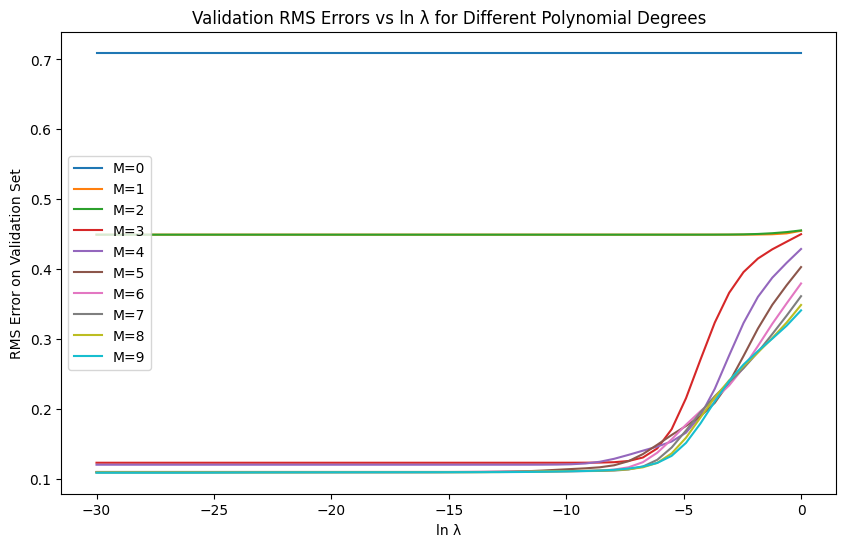

In [48]:
# 1.2.6) Model selection

# λ is a hyperparameter and cannot be determined through minimization of the regularized error function jointly with w on the training data, as this would always lead to λ = 0 and an overfitting model. Similarly, M is also a hyperparameter and minimizing the training error using M will lead to large values of M and overfitting.
# We also cannot use the test data to choose hyperparameters, as this would lead to overfitting on the test data. The test data should only be used once at the very end to provide an unbiased estimate of the generalization error.
# Instead, we can use a validation data set (aka hold-out set or development set), separate from both the training and test data.

# The technique of S-fold cross-validation, illustrated here for the case of S = 4, involves taking the available data and partitioning it into S groups of equal size. Then S −1 of the groups are used to train a set of models that are then evaluated on the remaining group. This procedure is then repeated for all S possible choices for the held-out group, indicated here by the red blocks, and the performance scores from the S runs are then averaged to give an overall performance estimate.

# We will generate a validation data set and use it to choose M and λ based on the RMS error on the validation data.
N_val = 100
x_n_val = np.linspace(0, 1, N_val)
t_n_val = np.sin(2 * np.pi * x_n_val)
t_n_val += np.random.normal(0, 0.1, N_val)
E_val = []
# calculating RMS errors for validation data
for M in M_test_range:
    for ln_lam in ln_lam_range:
        lam = np.exp(ln_lam)
        # w_0 = np.zeros(M + 1)  # initial guess for weights
        # result = minimize(E_reg, w_0, args=(lam,))  # minimize regularized error function
        # w_star = result.x
        w_star = minimize_error_function_reg(M, lam, x_n_val, t_n_val)
        # w_star = gradient_descent_reg(M, lam)
        E_val.append(E_rms(w_star, x_n_val, t_n_val))
        print(f'RMS error for degree {M} with ln λ = {ln_lam} on validation set: {E_val[-1]}')
# plotting RMS errors
E_val = np.array(E_val).reshape(len(M_test_range), len(ln_lam_range))
plt.figure(figsize=(10, 6))
for i, M in enumerate(M_test_range):
    plt.plot(ln_lam_range, E_val[i, :], label=f'M={M}')
plt.xlabel('ln λ')
plt.ylabel('RMS Error on Validation Set')
plt.legend()
plt.title('Validation RMS Errors vs ln λ for Different Polynomial Degrees')
print('1.2.6 plotted validation RMS errors vs ln λ for different polynomial degrees')
plt.savefig('../figures/1.2.6_validation_rms_vs_ln_lambda.png', dpi=150, bbox_inches='tight')
print('Saved figure to figures/1.2.6_validation_rms_vs_ln_lambda.png')
plt.show()
plt.close()